In [5]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp313-cp313-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp313-cp313-win_amd64.whl.metadata (9.3 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.1-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp313-cp313-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl (71 kB)
Using cached pillow-11.1.0-cp313-cp313-win_amd64.whl (2.6 MB)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv("C:/Users/Rocio/Desktop/ROCÍO/Todo_rocío/Curso_Data_Analyst/Codes/temario/temario/marketingcampaigns.csv", on_bad_lines='skip') ##ignora las líneas problemáticas

In [7]:
df.head()

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.1,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.9,0.30,social media,B2B,promotion,0.81,47511.35


In [8]:
#calcular la media de revenue 
df['revenue'].mean()

np.float64(511591.19527696795)

In [9]:
# Verificar si hay valores válidos en 'budget'
if df['budget'].notna().any():
    # convierte los valores no numéricos en nulos
    df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
    # Eliminar filas con valores nulos en 'budget'
    df = df.dropna(subset=['budget'])
    # Calcular la media de 'budget'
    mean_budget = df['budget'].mean()
    print(f"La media del presupuesto es: {mean_budget}")
else:
    print("No hay valores válidos en la columna 'budget'.")

La media del presupuesto es: 58995.980505836575


In [10]:
#calcular el máximo de revenue
df['revenue'].max()

np.float64(999712.49)

In [11]:
# Verificar si hay valores válidos en 'budget'
if df['budget'].notna().any():
     # convierte los valores no numéricos en nulos
    df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
    # Eliminar filas con valores nulos en 'budget'
    df = df.dropna(subset=['budget'])
    # Calcular el máximo de 'budget'
    max_budget = df['budget'].max()
    print(f"El máximo presupuesto es: {max_budget}")
else:
    print("No hay valores válidos en la columna 'budget'.")

El máximo presupuesto es: 9999999.0


In [12]:
#calcula los valores nulos de cada columna
df.isnull().sum()


campaign_name      0
start_date         1
end_date           1
budget             0
roi                2
type               1
target_audience    2
channel            0
conversion_rate    2
revenue            2
dtype: int64

In [55]:
#dar valor de "desconocido" a los valores nulos de type
df['type'] = df['type'].fillna('Desconocido')
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,net_profit
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48,701511.18
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10,498896.12
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42,373584.32
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73,75368.98
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35,8219.45
...,...,...,...,...,...,...,...,...,...,...,...
1023,Negative ROI test,2022-10-10,2023-05-05,-10000.00,-0.20,podcast,B2C,referral,0.10,0.00,10000.00
1025,Future campaign,2025-01-01,2025-06-01,75000.00,0.90,webinar,B2C,promotion,0.65,200000.00,125000.00
1027,No revenue campaign,2023-02-01,2023-08-01,20000.00,0.30,social media,B2B,organic,0.50,0.00,-20000.00
1030,Overlapping dates,2023-03-01,2022-12-31,60000.00,0.60,webinar,B2B,paid,0.70,90000.00,30000.00


In [14]:
#rellena los valores nulos con fill value la columna conversion_rate
df['conversion_rate'].fillna(value='FILL VALUE')
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35
...,...,...,...,...,...,...,...,...,...,...
1026,Extra long name campaign test,2023-04-15,2023-09-15,30000.00,0.25,email,NaN,paid,0.40,45000.00
1027,No revenue campaign,2023-02-01,2023-08-01,20000.00,0.30,social media,B2B,organic,0.50,NaN
1028,Random mess,2023-06-06,NaN,100000.00,NaN,podcast,NaN,referral,NaN,300000.00
1030,Overlapping dates,2023-03-01,2022-12-31,60000.00,0.60,webinar,B2B,paid,0.70,90000.00


In [15]:
#controlar fechas locas de start_date
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35
...,...,...,...,...,...,...,...,...,...,...
1026,Extra long name campaign test,2023-04-15,2023-09-15,30000.00,0.25,email,NaN,paid,0.40,45000.00
1027,No revenue campaign,2023-02-01,2023-08-01,20000.00,0.30,social media,B2B,organic,0.50,NaN
1028,Random mess,2023-06-06,NaN,100000.00,NaN,podcast,NaN,referral,NaN,300000.00
1030,Overlapping dates,2023-03-01,2022-12-31,60000.00,0.60,webinar,B2B,paid,0.70,90000.00


In [16]:
#controlar fechas locas de end_date
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35
...,...,...,...,...,...,...,...,...,...,...
1026,Extra long name campaign test,2023-04-15,2023-09-15,30000.00,0.25,email,NaN,paid,0.40,45000.00
1027,No revenue campaign,2023-02-01,2023-08-01,20000.00,0.30,social media,B2B,organic,0.50,NaN
1028,Random mess,2023-06-06,NaT,100000.00,NaN,podcast,NaN,referral,NaN,300000.00
1030,Overlapping dates,2023-03-01,2022-12-31,60000.00,0.60,webinar,B2B,paid,0.70,90000.00


In [17]:
#eliminar las filas con fechas inválidas en start_date
df = df.dropna(subset=['start_date'])
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35
...,...,...,...,...,...,...,...,...,...,...
1026,Extra long name campaign test,2023-04-15,2023-09-15,30000.00,0.25,email,NaN,paid,0.40,45000.00
1027,No revenue campaign,2023-02-01,2023-08-01,20000.00,0.30,social media,B2B,organic,0.50,NaN
1028,Random mess,2023-06-06,NaT,100000.00,NaN,podcast,NaN,referral,NaN,300000.00
1030,Overlapping dates,2023-03-01,2022-12-31,60000.00,0.60,webinar,B2B,paid,0.70,90000.00


In [18]:
#eliminar las filas con fechas inválidas en end_date
df = df.dropna(subset=['end_date'])
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35
...,...,...,...,...,...,...,...,...,...,...
1025,Future campaign,2025-01-01,2025-06-01,75000.00,0.90,webinar,B2C,promotion,0.65,200000.00
1026,Extra long name campaign test,2023-04-15,2023-09-15,30000.00,0.25,email,NaN,paid,0.40,45000.00
1027,No revenue campaign,2023-02-01,2023-08-01,20000.00,0.30,social media,B2B,organic,0.50,NaN
1030,Overlapping dates,2023-03-01,2022-12-31,60000.00,0.60,webinar,B2B,paid,0.70,90000.00


In [19]:
#reemplazar los valores de la columna roi que contienen comas por puntos y convertirlos a float
df['roi'].astype(str).replace(',', '.').astype(float)
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35
...,...,...,...,...,...,...,...,...,...,...
1025,Future campaign,2025-01-01,2025-06-01,75000.00,0.90,webinar,B2C,promotion,0.65,200000.00
1026,Extra long name campaign test,2023-04-15,2023-09-15,30000.00,0.25,email,NaN,paid,0.40,45000.00
1027,No revenue campaign,2023-02-01,2023-08-01,20000.00,0.30,social media,B2B,organic,0.50,NaN
1030,Overlapping dates,2023-03-01,2022-12-31,60000.00,0.60,webinar,B2B,paid,0.70,90000.00


In [20]:
#reemplazar los valores de la columna conversion_rate que contienen comas por puntos y convertirlos a float
df['conversion_rate'].astype(str).replace(',', '.').astype(float)
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35
...,...,...,...,...,...,...,...,...,...,...
1025,Future campaign,2025-01-01,2025-06-01,75000.00,0.90,webinar,B2C,promotion,0.65,200000.00
1026,Extra long name campaign test,2023-04-15,2023-09-15,30000.00,0.25,email,NaN,paid,0.40,45000.00
1027,No revenue campaign,2023-02-01,2023-08-01,20000.00,0.30,social media,B2B,organic,0.50,NaN
1030,Overlapping dates,2023-03-01,2022-12-31,60000.00,0.60,webinar,B2B,paid,0.70,90000.00


In [21]:
# Reemplazar comas por puntos (si existen) en budget y convertir a numérico
df['budget'].astype(str).str.replace(',', '').astype(float)
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35
...,...,...,...,...,...,...,...,...,...,...
1025,Future campaign,2025-01-01,2025-06-01,75000.00,0.90,webinar,B2C,promotion,0.65,200000.00
1026,Extra long name campaign test,2023-04-15,2023-09-15,30000.00,0.25,email,NaN,paid,0.40,45000.00
1027,No revenue campaign,2023-02-01,2023-08-01,20000.00,0.30,social media,B2B,organic,0.50,NaN
1030,Overlapping dates,2023-03-01,2022-12-31,60000.00,0.60,webinar,B2B,paid,0.70,90000.00


In [22]:
# Reemplazar comas por puntos (si existen) en revenue y convertir a numérico
df['revenue'].astype(str).str.replace(',', '').astype(float)
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35
...,...,...,...,...,...,...,...,...,...,...
1025,Future campaign,2025-01-01,2025-06-01,75000.00,0.90,webinar,B2C,promotion,0.65,200000.00
1026,Extra long name campaign test,2023-04-15,2023-09-15,30000.00,0.25,email,NaN,paid,0.40,45000.00
1027,No revenue campaign,2023-02-01,2023-08-01,20000.00,0.30,social media,B2B,organic,0.50,NaN
1030,Overlapping dates,2023-03-01,2022-12-31,60000.00,0.60,webinar,B2B,paid,0.70,90000.00


In [23]:
#eliminar duplicados
df = df.drop_duplicates()
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35
...,...,...,...,...,...,...,...,...,...,...
1025,Future campaign,2025-01-01,2025-06-01,75000.00,0.90,webinar,B2C,promotion,0.65,200000.00
1026,Extra long name campaign test,2023-04-15,2023-09-15,30000.00,0.25,email,NaN,paid,0.40,45000.00
1027,No revenue campaign,2023-02-01,2023-08-01,20000.00,0.30,social media,B2B,organic,0.50,NaN
1030,Overlapping dates,2023-03-01,2022-12-31,60000.00,0.60,webinar,B2B,paid,0.70,90000.00


In [24]:
#target_audience solo puede tener valores 'b2b' y 'b2c'
df['target_audience'].where(df['target_audience'].isin(['b2b', 'b2c']))
# Eliminar filas con valores nulos en 'target_audience'
df = df.dropna(subset=['target_audience'])
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35
...,...,...,...,...,...,...,...,...,...,...
1023,Negative ROI test,2022-10-10,2023-05-05,-10000.00,-0.20,podcast,B2C,referral,0.10,NaN
1025,Future campaign,2025-01-01,2025-06-01,75000.00,0.90,webinar,B2C,promotion,0.65,200000.00
1027,No revenue campaign,2023-02-01,2023-08-01,20000.00,0.30,social media,B2B,organic,0.50,NaN
1030,Overlapping dates,2023-03-01,2022-12-31,60000.00,0.60,webinar,B2B,paid,0.70,90000.00


In [25]:
# Obtener valores únicos en la columna 'channel' para ver errores
unique_values = df['channel'].unique() #no hay errores en las palabras
print(unique_values)

['organic' 'promotion' 'paid' 'referral']


In [131]:
# Identificar los valores duplicados en la columna 'channel'
duplicated_channels = df['channel'][df['channel'].duplicated(keep=False)]
# Filtrar el DataFrame para mantener solo las filas con valores duplicados en 'channel'
df = df[df['channel'].isin(duplicated_channels)]
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,net_profit
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,b2b,organic,0.40,709593.48,701511.18
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,b2c,promotion,0.66,516609.10,498896.12
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,b2b,paid,0.28,458227.42,373584.32
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,b2b,organic,0.19,89958.73,75368.98
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,b2b,promotion,0.81,47511.35,8219.45
...,...,...,...,...,...,...,...,...,...,...,...
1023,Negative ROI test,2022-10-10,2023-05-05,-10000.00,-0.20,podcast,b2c,referral,0.10,0.00,10000.00
1025,Future campaign,2025-01-01,2025-06-01,75000.00,0.90,webinar,b2c,promotion,0.65,200000.00,125000.00
1027,No revenue campaign,2023-02-01,2023-08-01,20000.00,0.30,social media,b2b,organic,0.50,0.00,-20000.00
1030,Overlapping dates,2023-03-01,2022-12-31,60000.00,0.60,webinar,b2b,paid,0.70,90000.00,30000.00


In [27]:
# En 'revenue' convertir las columnas a numérico, reemplazando valores no válidos con NaN 
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
# Rellenar valores nulos con 0 
df['revenue'] = df['revenue'].fillna(0)
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35
...,...,...,...,...,...,...,...,...,...,...
1023,Negative ROI test,2022-10-10,2023-05-05,-10000.00,-0.20,podcast,B2C,referral,0.10,0.00
1025,Future campaign,2025-01-01,2025-06-01,75000.00,0.90,webinar,B2C,promotion,0.65,200000.00
1027,No revenue campaign,2023-02-01,2023-08-01,20000.00,0.30,social media,B2B,organic,0.50,0.00
1030,Overlapping dates,2023-03-01,2022-12-31,60000.00,0.60,webinar,B2B,paid,0.70,90000.00


In [28]:
# En 'budget' convertir las columnas a numérico, reemplazando valores no válidos con NaN 
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
# Rellenar valores nulos con 0 
df['budget'] = df['budget'].fillna(0)
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35
...,...,...,...,...,...,...,...,...,...,...
1023,Negative ROI test,2022-10-10,2023-05-05,-10000.00,-0.20,podcast,B2C,referral,0.10,0.00
1025,Future campaign,2025-01-01,2025-06-01,75000.00,0.90,webinar,B2C,promotion,0.65,200000.00
1027,No revenue campaign,2023-02-01,2023-08-01,20000.00,0.30,social media,B2B,organic,0.50,0.00
1030,Overlapping dates,2023-03-01,2022-12-31,60000.00,0.60,webinar,B2B,paid,0.70,90000.00


In [29]:
# Calcular el beneficio neto
df['net_profit'] = df['revenue'] - df['budget']
df

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,net_profit
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,0.40,709593.48,701511.18
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10,498896.12
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42,373584.32
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73,75368.98
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,0.81,47511.35,8219.45
...,...,...,...,...,...,...,...,...,...,...,...
1023,Negative ROI test,2022-10-10,2023-05-05,-10000.00,-0.20,podcast,B2C,referral,0.10,0.00,10000.00
1025,Future campaign,2025-01-01,2025-06-01,75000.00,0.90,webinar,B2C,promotion,0.65,200000.00,125000.00
1027,No revenue campaign,2023-02-01,2023-08-01,20000.00,0.30,social media,B2B,organic,0.50,0.00,-20000.00
1030,Overlapping dates,2023-03-01,2022-12-31,60000.00,0.60,webinar,B2B,paid,0.70,90000.00,30000.00


In [119]:
# Detectar outliers usando el método IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Primer cuartil
    Q3 = data[column].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico
    lower_bound = Q1 - 1.5 * IQR  # Límite inferior
    upper_bound = Q3 + 1.5 * IQR  # Límite superior
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"\nOutliers en '{column}' usando IQR:")
    print(outliers[[column]])
    return outliers

# Detectar outliers usando el método Z-score
def detect_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs(stats.zscore(data[column]))
    outliers = data[z_scores > threshold]
    print(f"\nOutliers en '{column}' usando Z-score:")
    print(outliers[[column]])
    return outliers

# Aplicar ambos métodos a las columnas 'budget' y 'revenue'
columns_to_analyze = ['budget', 'revenue']
for column in columns_to_analyze:
    detect_outliers_iqr(df, column)
    detect_outliers_zscore(df, column)


Outliers en 'budget' usando IQR:
         budget
1008  9999999.0

Outliers en 'budget' usando Z-score:
         budget
1008  9999999.0

Outliers en 'revenue' usando IQR:
Empty DataFrame
Columns: [revenue]
Index: []

Outliers en 'revenue' usando Z-score:
Empty DataFrame
Columns: [revenue]
Index: []


In [ ]:
# Calcular el porcentaje de valores faltantes por columna
missing_percentage = df.isnull().sum() / len(df) * 100

# Crear un DataFrame para visualizar los resultados
missing_data = pd.DataFrame({
    'Columna': df.columns,
    'Valores Faltantes (%)': missing_percentage
}).sort_values(by='Valores Faltantes (%)', ascending=False)

# Mostrar el resultado
print(missing_data)

                         Columna  Valores Faltantes (%)
campaign_name      campaign_name                    0.0
start_date            start_date                    0.0
end_date                end_date                    0.0
budget                    budget                    0.0
roi                          roi                    0.0
type                        type                    0.0
target_audience  target_audience                    0.0
channel                  channel                    0.0
conversion_rate  conversion_rate                    0.0
revenue                  revenue                    0.0
net_profit            net_profit                    0.0


In [133]:
# Eliminar símbolos de moneda y separadores de miles, y convertir a float
df['budget'] = df['budget'].astype(str).str.replace(r'[^\d.]', '', regex=True).astype(float)
df['revenue'] = df['revenue'].astype(str).str.replace(r'[^\d.]', '', regex=True).astype(float)

# Verificar las columnas después de la conversión
print(df[['budget', 'revenue']].dtypes)
print(df[['budget', 'revenue']].head())

budget     float64
revenue    float64
dtype: object
     budget    revenue
0   8082.30  709593.48
1  17712.98  516609.10
2  84643.10  458227.42
3  14589.75   89958.73
4  39291.90   47511.35


In [ ]:
# Normalizar texto: Convertir a minúsculas y eliminar espacios adicionales
df['type'] = df['type'].str.strip().str.lower()

# Reemplazar valores incorrectos o inconsistentes
correcciones = {
    'socialmedia': 'social media',  # Ejemplo de corrección
    'promotion ': 'promotion',     # Eliminar espacios adicionales
    'webinar ': 'webinar',         # Otro ejemplo
    'email': 'email marketing',     # Ejemplo de corrección
    'email marketing ': 'email marketing',  # Eliminar espacios adicionales 
}
df['type'] = df['type'].replace(correcciones)
print(df['type'].unique())

['email marketing' 'podcast' 'webinar' 'social media' 'desconocido']


In [ ]:
from difflib import get_close_matches
# Lista de categorías correctas
categorias_correctas = ['social media', 'promotion', 'webinar']
# Función para corregir valores basados en distancia de edición
def corregir_categoria(valor, categorias_correctas):
    # Buscar la categoría más cercana al valor actual
    coincidencia = get_close_matches(valor, categorias_correctas, n=1, cutoff=0.8)
    return coincidencia[0] if coincidencia else valor

# Aplicar la corrección a la columna 'type'
df['type'] = df['type'].apply(lambda x: corregir_categoria(x, categorias_correctas))

# Verificar los valores únicos después de la corrección
print(df['type'].unique())

['email marketing' 'podcast' 'webinar' 'social media' 'desconocido']


In [139]:
# Asegurarse de que las columnas de fechas estén en formato datetime
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

# Extraer componentes temporales de 'start_date'
df['start_mes'] = df['start_date'].dt.month          # Mes de inicio
df['start_trimestre'] = df['start_date'].dt.quarter  # Trimestre de inicio
df['start_año'] = df['start_date'].dt.year           # Año de inicio

# Extraer componentes temporales de 'end_date'
df['end_mes'] = df['end_date'].dt.month              # Mes de finalización
df['end_trimestre'] = df['end_date'].dt.quarter      # Trimestre de finalización
df['end_año'] = df['end_date'].dt.year               # Año de finalización

# Verificar el resultado
print(df[['start_date', 'start_mes', 'start_trimestre', 'start_año', 
          'end_date', 'end_mes', 'end_trimestre', 'end_año']].head())

  start_date  start_mes  start_trimestre  start_año   end_date  end_mes  \
0 2023-04-01          4                2       2023 2024-02-23        2   
1 2023-02-15          2                1       2023 2024-04-22        4   
2 2022-12-20         12                4       2022 2023-10-11       10   
3 2022-09-26          9                3       2022 2023-09-27        9   
4 2023-07-07          7                3       2023 2024-05-15        5   

   end_trimestre  end_año  
0              1     2024  
1              2     2024  
2              4     2023  
3              3     2023  
4              2     2024  


In [140]:
# Crear categorías de rendimiento basadas en ROI
df['roi_categoria'] = pd.cut(
    df['roi'], 
    bins=[-float('inf'), 0, 0.2, 0.5, float('inf')],  # Definir los límites de las categorías
    labels=['Pérdida', 'Bajo', 'Medio', 'Alto']       # Etiquetas para las categorías
)

# Crear categorías de rendimiento basadas en la tasa de conversión
df['conversion_categoria'] = pd.cut(
    df['conversion_rate'], 
    bins=[-float('inf'), 0.1, 0.3, 0.5, float('inf')],  # Definir los límites de las categorías
    labels=['Muy Baja', 'Baja', 'Media', 'Alta']        # Etiquetas para las categorías
)

# Verificar el resultado
print(df[['roi', 'roi_categoria', 'conversion_rate', 'conversion_categoria']].head())

    roi roi_categoria  conversion_rate conversion_categoria
0  0.35         Medio             0.40                Media
1  0.74          Alto             0.66                 Alta
2  0.37         Medio             0.28                 Baja
3  0.47         Medio             0.19                 Baja
4  0.30         Medio             0.81                 Alta


In [145]:
# Asegurarse de que no haya valores nulos en 'budget' y 'conversion_rate'
df['budget'] = df['budget'].fillna(0)
df['conversion_rate'] = df['conversion_rate'].fillna(0)

# Evitar divisiones por cero
df['cost_per_conversion'] = df.apply(
    lambda row: row['budget'] / row['conversion_rate'] if row['conversion_rate'] > 0 else 0, axis=1
)

# Verificar el resultado
print(df[['budget', 'conversion_rate', 'cost_per_conversion']].head())

     budget  conversion_rate  cost_per_conversion
0   8082.30             0.40         20205.750000
1  17712.98             0.66         26837.848485
2  84643.10             0.28        302296.785714
3  14589.75             0.19         76788.157895
4  39291.90             0.81         48508.518519


In [146]:
# Crear una variable binaria para ROI positivo
df['flag_roi_positivo'] = (df['roi'] > 0).astype(int)

# Crear una variable binaria para conversión alta (umbral: 0.3)
df['flag_conversion_alta'] = (df['conversion_rate'] > 0.3).astype(int)

# Crear una variable binaria para presupuesto alto (umbral: 100000)
df['flag_presupuesto_alto'] = (df['budget'] > 100000).astype(int)

# Verificar el resultado
print(df[['roi', 'flag_roi_positivo', 'conversion_rate', 'flag_conversion_alta', 'budget', 'flag_presupuesto_alto']].head())

    roi  flag_roi_positivo  conversion_rate  flag_conversion_alta    budget  \
0  0.35                  1             0.40                     1   8082.30   
1  0.74                  1             0.66                     1  17712.98   
2  0.37                  1             0.28                     0  84643.10   
3  0.47                  1             0.19                     0  14589.75   
4  0.30                  1             0.81                     1  39291.90   

   flag_presupuesto_alto  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  


In [ ]:
# Verificar los tipos de datos de todas las columnas
print("Tipos de datos actuales:") #todos están correctos
print(df.dtypes)

Tipos de datos actuales:
campaign_name                    object
start_date               datetime64[ns]
end_date                 datetime64[ns]
budget                          float64
roi                             float64
type                             object
target_audience                  object
channel                          object
conversion_rate                 float64
revenue                         float64
net_profit                      float64
start_mes                         int32
start_trimestre                   int32
start_año                         int32
end_mes                           int32
end_trimestre                     int32
end_año                           int32
roi_categoria                  category
conversion_categoria           category
cost_per_conversion             float64
flag_roi_positivo                 int64
flag_conversion_alta              int64
flag_presupuesto_alto             int64
dtype: object


In [150]:
# Calcular el ROI esperado basado en 'budget' y 'revenue'
df['roi_calculado'] = (df['revenue'] - df['budget']) / df['budget']

# Comparar el ROI calculado con el ROI existente en el DataFrame
df['roi_inconsistente'] = (df['roi'] != df['roi_calculado']).astype(int)

# Filtrar filas con inconsistencias
inconsistencias = df[df['roi_inconsistente'] == 1]

# Verificar el resultado
print("Filas con inconsistencias entre 'budget', 'revenue' y 'roi':")
print(inconsistencias[['budget', 'revenue', 'roi', 'roi_calculado']])

Filas con inconsistencias entre 'budget', 'revenue' y 'roi':
        budget    revenue   roi  roi_calculado
0      8082.30  709593.48  0.35      86.795984
1     17712.98  516609.10  0.74      28.165567
2     84643.10  458227.42  0.37       4.413642
3     14589.75   89958.73  0.47       5.165886
4     39291.90   47511.35  0.30       0.209189
...        ...        ...   ...            ...
1023  10000.00       0.00 -0.20      -1.000000
1025  75000.00  200000.00  0.90       1.666667
1027  20000.00       0.00  0.30      -1.000000
1030  60000.00   90000.00  0.60       0.500000
1031  40000.00  120000.00  0.80       2.000000

[1008 rows x 4 columns]


In [151]:
# Inspeccionar las filas con inconsistencias
print("Filas con inconsistencias entre 'budget', 'revenue' y 'roi':")
print(inconsistencias[['budget', 'revenue', 'roi', 'roi_calculado']])

# Recalcular el ROI si los valores de 'budget' y 'revenue' son correctos
df.loc[df['roi_inconsistente'] == 1, 'roi'] = df['roi_calculado']

# Verificar nuevamente las inconsistencias
df['roi_inconsistente'] = (df['roi'] != df['roi_calculado']).astype(int)
inconsistencias_actualizadas = df[df['roi_inconsistente'] == 1]

print("\nInconsistencias después de la corrección:")
print(inconsistencias_actualizadas[['budget', 'revenue', 'roi', 'roi_calculado']])

Filas con inconsistencias entre 'budget', 'revenue' y 'roi':
        budget    revenue   roi  roi_calculado
0      8082.30  709593.48  0.35      86.795984
1     17712.98  516609.10  0.74      28.165567
2     84643.10  458227.42  0.37       4.413642
3     14589.75   89958.73  0.47       5.165886
4     39291.90   47511.35  0.30       0.209189
...        ...        ...   ...            ...
1023  10000.00       0.00 -0.20      -1.000000
1025  75000.00  200000.00  0.90       1.666667
1027  20000.00       0.00  0.30      -1.000000
1030  60000.00   90000.00  0.60       0.500000
1031  40000.00  120000.00  0.80       2.000000

[1008 rows x 4 columns]

Inconsistencias después de la corrección:
Empty DataFrame
Columns: [budget, revenue, roi, roi_calculado]
Index: []


In [ ]:
print(df[['budget', 'revenue', 'roi', 'roi_calculado']].head()) #ya no hay inconsistencias

     budget    revenue        roi  roi_calculado
0   8082.30  709593.48  86.795984      86.795984
1  17712.98  516609.10  28.165567      28.165567
2  84643.10  458227.42   4.413642       4.413642
3  14589.75   89958.73   5.165886       5.165886
4  39291.90   47511.35   0.209189       0.209189


In [153]:
# Validación 1: revenue no puede ser menor que budget
df['inconsistencia_revenue_budget'] = (df['revenue'] < df['budget']).astype(int)

# Validación 2: ROI debe ser consistente con budget y revenue
df['roi_calculado'] = (df['revenue'] - df['budget']) / df['budget']
df['inconsistencia_roi'] = (df['roi'] != df['roi_calculado']).astype(int)

# Validación 3: conversion_rate debe estar en el rango [0, 1]
df['inconsistencia_conversion_rate'] = ((df['conversion_rate'] < 0) | (df['conversion_rate'] > 1)).astype(int)

# Validación 4: start_date debe ser anterior a end_date
df['inconsistencia_fechas'] = (df['start_date'] > df['end_date']).astype(int)

# Filtrar filas con inconsistencias
inconsistencias = df[
    (df['inconsistencia_revenue_budget'] == 1) |
    (df['inconsistencia_roi'] == 1) |
    (df['inconsistencia_conversion_rate'] == 1) |
    (df['inconsistencia_fechas'] == 1)
]

# Mostrar las filas con inconsistencias
print("Filas con inconsistencias lógicas:")
print(inconsistencias[['budget', 'revenue', 'roi', 'roi_calculado', 'conversion_rate', 'start_date', 'end_date']])

Filas con inconsistencias lógicas:
          budget    revenue       roi  roi_calculado  conversion_rate  \
14      36848.30    4190.95 -0.886265      -0.886265             0.10   
24      48366.50   41004.95 -0.152203      -0.152203             0.87   
28      99838.63   14073.59 -0.859037      -0.859037             0.18   
60      79220.80   29575.48 -0.626670      -0.626670             0.30   
83      52125.20   27754.76 -0.467537      -0.467537             0.80   
202     91490.92   38601.99 -0.578078      -0.578078             0.95   
240     78742.39   10253.30 -0.869787      -0.869787             0.79   
256     85249.47   34642.19 -0.593637      -0.593637             0.90   
267     93497.40   58328.00 -0.376154      -0.376154             0.37   
269     63250.91   32045.66 -0.493357      -0.493357             0.76   
280     96380.65   35031.43 -0.636530      -0.636530             0.18   
295     73723.40   62558.41 -0.151444      -0.151444             0.21   
330     99891.35

In [ ]:
# Verificar la cantidad de valores nulos por columna
print("Valores nulos por columna:")
print(df.isnull().sum()) #no hay valores nulos

Valores nulos por columna:
campaign_name                     0
start_date                        0
end_date                          0
budget                            0
roi                               0
type                              0
target_audience                   0
channel                           0
conversion_rate                   0
revenue                           0
net_profit                        0
start_mes                         0
start_trimestre                   0
start_año                         0
end_mes                           0
end_trimestre                     0
end_año                           0
roi_categoria                     0
conversion_categoria              0
cost_per_conversion               0
flag_roi_positivo                 0
flag_conversion_alta              0
flag_presupuesto_alto             0
roi_calculado                     0
roi_inconsistente                 0
inconsistencia_revenue_budget     0
inconsistencia_roi                0
i

In [ ]:
print("Promedio B2B:", b2b_conversion_mean) #hay valores no válidos
print("Promedio B2C:", b2c_conversion_mean)

Promedio B2B: 0.5509073359073359
Promedio B2C: 0.5359183673469389


In [46]:
# ¿Qué canal de marketing se utiliza con mayor frecuencia?
df['channel'].value_counts().sort_values(ascending=False) #el más utilizado es promotion

channel
promotion    274
referral     252
organic      243
paid         239
Name: count, dtype: int64

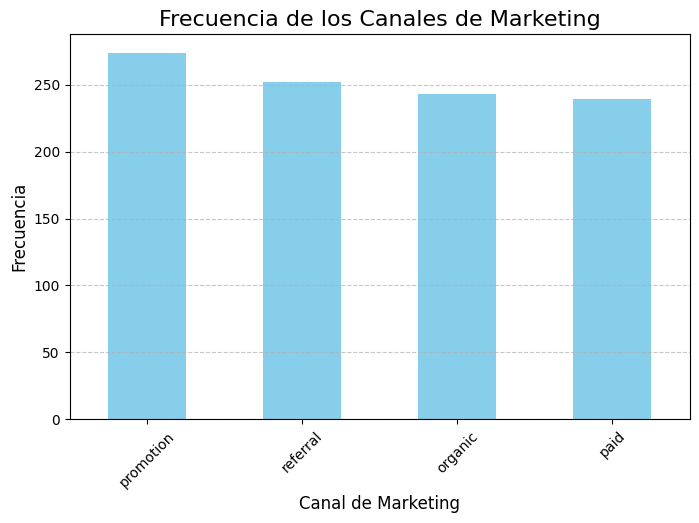

In [50]:
frecuencia=df['channel'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
frecuencia.plot(kind='bar', color='skyblue')
plt.title('Frecuencia de los Canales de Marketing', fontsize=16)
plt.xlabel('Canal de Marketing', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [ ]:
#¿Qué canal genera mejor ROI?
df.groupby('channel')['roi'].mean().sort_values(ascending=False) #el que mejor ROI genera es referral

channel
referral     0.549802
paid         0.541046
promotion    0.533212
organic      0.518066
Name: roi, dtype: float64

C:\Users\Rocio\AppData\Local\Temp\ipykernel_10868\677010157.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='channel', y='roi', palette='Set2')


([0, 1, 2, 3],
 [Text(0, 0, 'organic'),
  Text(1, 0, 'promotion'),
  Text(2, 0, 'paid'),
  Text(3, 0, 'referral')])

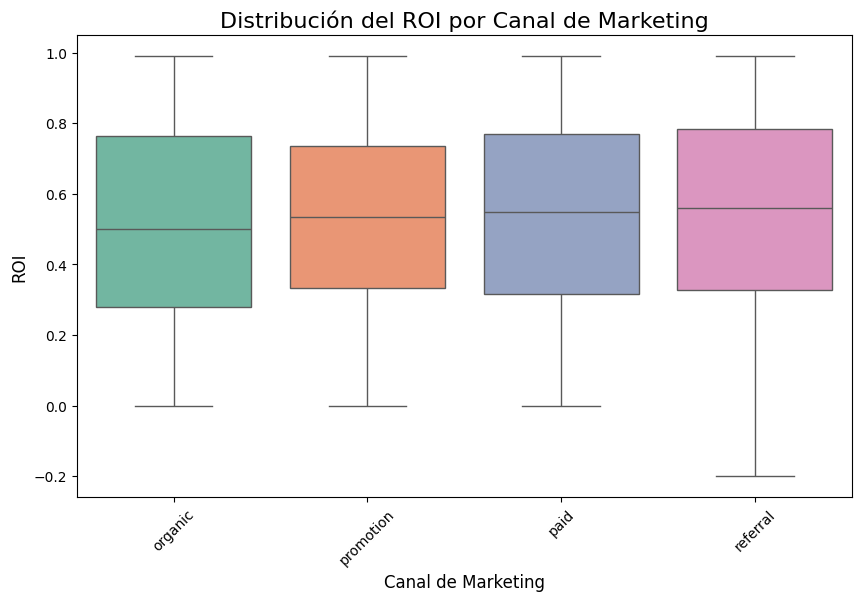

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='channel', y='roi', palette='Set2')
plt.title('Distribución del ROI por Canal de Marketing', fontsize=16)
plt.xlabel('Canal de Marketing', fontsize=12)
plt.ylabel('ROI', fontsize=12)
plt.xticks(rotation=45)

In [ ]:
#¿Qué tipo de campaña genera más ingresos en promedio?
df.groupby('type')['revenue'].mean().sort_values(ascending=False) #el que más ingresos genera es social media

type
social media    527469.748426
email           524626.248000
podcast         515633.191310
webinar         493796.304449
Desconocido     206241.460000
Name: revenue, dtype: float64

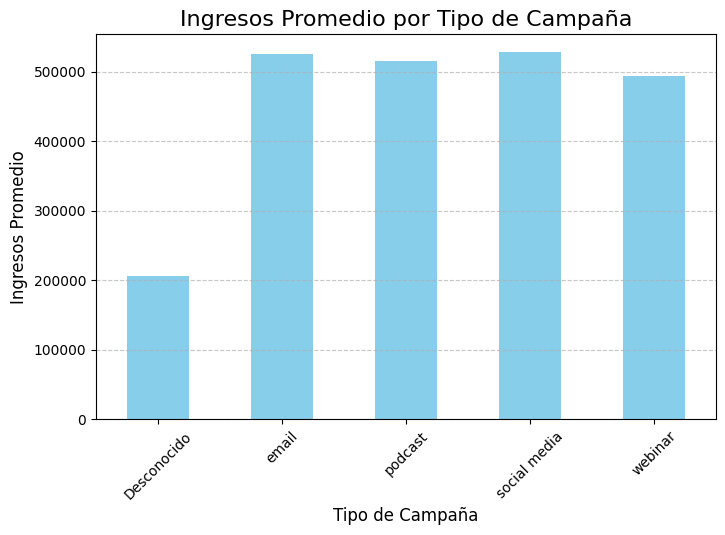

In [ ]:
promedio_ingresos = df.groupby('type')['revenue'].mean()
plt.figure(figsize=(8, 5))
promedio_ingresos.plot(kind='bar', color='skyblue')
plt.title('Ingresos Promedio por Tipo de Campaña', fontsize=16)
plt.xlabel('Tipo de Campaña', fontsize=12)
plt.ylabel('Ingresos Promedio', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [ ]:
#¿Qué campaña tiene mejor conversión?
df.groupby('type')['conversion_rate'].mean().sort_values(ascending=False) #la que mejor conversión tiene es webinar

type
webinar         0.556426
social media    0.545362
email           0.543679
podcast         0.527162
Desconocido     0.520000
Name: conversion_rate, dtype: float64

Text(0.5, 0, 'Tipo de Campaña')

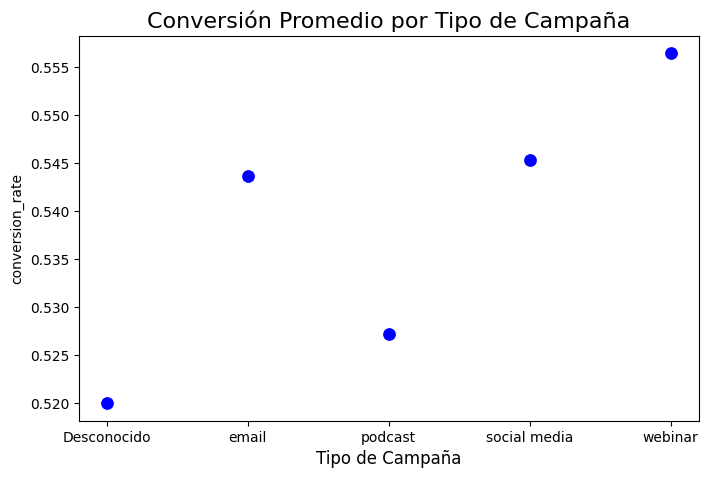

In [62]:
conversion_promedio = df.groupby('type')['conversion_rate'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.scatterplot(data=conversion_promedio, x='type', y='conversion_rate', s=100, color='blue')
plt.title('Conversión Promedio por Tipo de Campaña', fontsize=16)
plt.xlabel('Tipo de Campaña', fontsize=12)

In [ ]:
# ¿Qué campaña genera el mejor roi?
df.groupby('type')['roi'].mean().sort_values(ascending=False) #el que mejor ROI tiene es social media

type
social media    0.551489
webinar         0.535703
podcast         0.531354
email           0.526000
Desconocido     0.400000
Name: roi, dtype: float64

In [ ]:
# ¿Cuál audiencia genera mejor roi?
df.groupby('target_audience')['roi'].mean().sort_values(ascending=False) #la que mejor ROI tiene es b2b

target_audience
B2B    0.541988
B2C    0.528776
Name: roi, dtype: float64

In [ ]:
# ¿Qué presupuesto genera más roi?
df.groupby('budget')['roi'].mean().sort_values(ascending=False) #el que mejor ROI tiene es 71941.12

budget
 71941.12    0.99
 88977.21    0.99
 78803.16    0.99
 32343.79    0.99
 20328.53    0.99
             ... 
 96511.42    0.00
 28460.11    0.00
 52804.87    0.00
 63938.71    0.00
-10000.00   -0.20
Name: roi, Length: 1005, dtype: float64

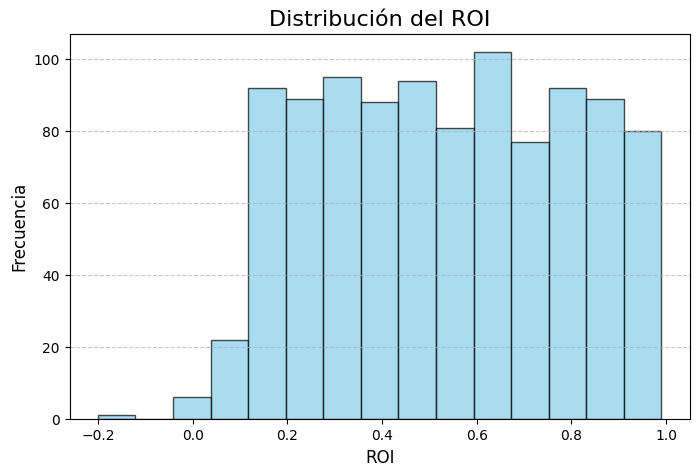

In [69]:
plt.figure(figsize=(8, 5))
plt.hist(df['roi'], bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribución del ROI', fontsize=16)
plt.xlabel('ROI', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

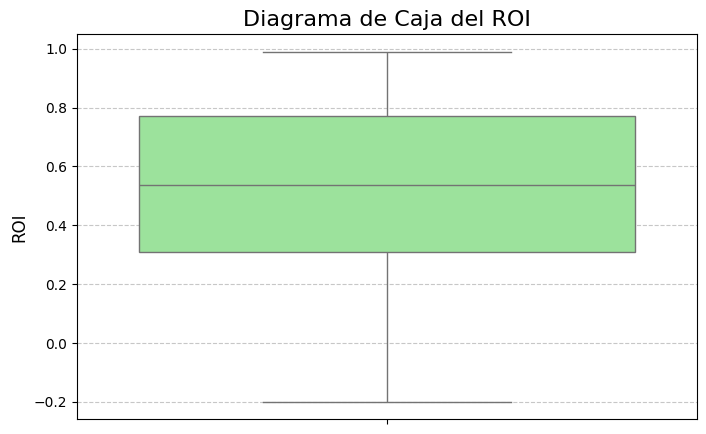

In [71]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='roi', color='lightgreen')
plt.title('Diagrama de Caja del ROI', fontsize=16)
plt.ylabel('ROI', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

Text(0.5, 1.0, 'Mapa de Calor de Correlaciones')

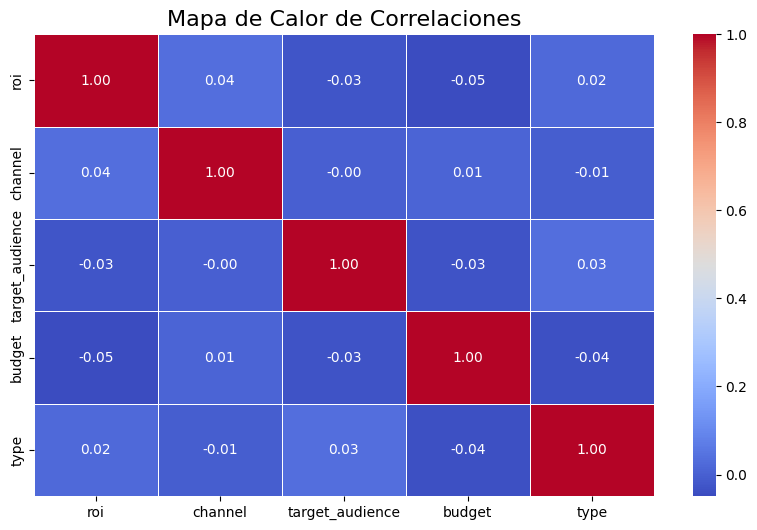

In [76]:
columns = ['roi', 'channel', 'target_audience', 'budget', 'type']
df_encoded = df.copy()
df_encoded['channel'] = df_encoded['channel'].astype('category').cat.codes
df_encoded['target_audience'] = df_encoded['target_audience'].astype('category').cat.codes
df_encoded['type'] = df_encoded['type'].astype('category').cat.codes
correlation_matrix = df_encoded[columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones', fontsize=16)

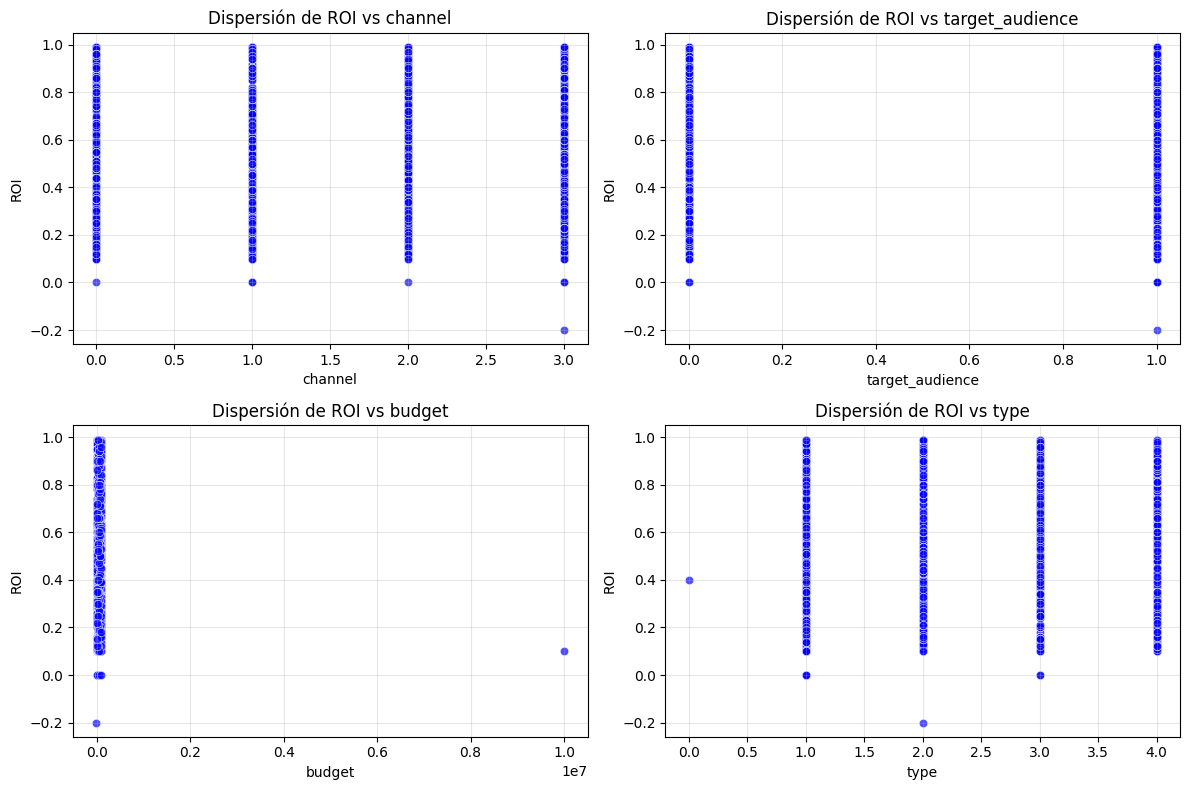

In [80]:
df_encoded = df.copy()
df_encoded['channel'] = df_encoded['channel'].astype('category').cat.codes
df_encoded['target_audience'] = df_encoded['target_audience'].astype('category').cat.codes
df_encoded['type'] = df_encoded['type'].astype('category').cat.codes
variables = ['channel', 'target_audience', 'budget', 'type']
plt.figure(figsize=(12, 8))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)  # Crear una cuadrícula de 2x2
    sns.scatterplot(data=df_encoded, x=var, y='roi', color='blue', alpha=0.7)
    plt.title(f'Dispersión de ROI vs {var}', fontsize=12)
    plt.xlabel(var, fontsize=10)
    plt.ylabel('ROI', fontsize=10)
    plt.grid(alpha=0.3)

plt.tight_layout()

In [86]:
# ¿Hay diferencias significativas en la tasa de conversión entre audiencias B2B y B2C?
from scipy import stats
b2b_conversion = df[df['target_audience'] == 'b2b']['conversion_rate']
b2c_conversion = df[df['target_audience'] == 'b2c']['conversion_rate']
t_stat, p_value = stats.ttest_ind(b2b_conversion, b2c_conversion)
if p_value < 0.05:
    print("Hay diferencias significativas en la tasa de conversión entre B2B y B2C.")
else:
    print("No hay diferencias significativas en la tasa de conversión entre B2B y B2C.")

No hay diferencias significativas en la tasa de conversión entre B2B y B2C.


In [92]:
b2b_conversion_mean = df[df['target_audience'] == 'b2b']['conversion_rate'].mean()
b2c_conversion_mean = df[df['target_audience'] == 'b2c']['conversion_rate'].mean()
if pd.isna(b2b_conversion_mean) or pd.isna(b2c_conversion_mean):
    print("Error: No se encontraron datos válidos para B2B o B2C.")
else:
    # Crear un DataFrame para el gráfico
    conversion_data = {
        'Audiencia': ['B2B', 'B2C'],
        'Tasa de Conversión Promedio': [b2b_conversion_mean, b2c_conversion_mean]
    }

Error: No se encontraron datos válidos para B2B o B2C.


In [ ]:
print("Promedio B2B:", b2b_conversion_mean) #hay valores no válidos
print("Promedio B2C:", b2c_conversion_mean)

Promedio B2B: 0.5509073359073359
Promedio B2C: 0.5359183673469389


In [ ]:
print(df['target_audience'].unique()) #verifico los valores únicos

['B2B' 'B2C']


In [ ]:
df['target_audience'] = df['target_audience'].str.strip().str.lower() #elimino espacios y quito mayúsculas
print(df['target_audience'].unique())

['b2b' 'b2c']


In [104]:
print("Filas B2B:", len(df[df['target_audience'] == 'b2b'])) #verifico que no dan 0
print("Filas B2C:", len(df[df['target_audience'] == 'b2c']))

Filas B2B: 518
Filas B2C: 490


In [ ]:
print("Promedio B2B:", b2b_conversion_mean) #ya hay valores válidos
print("Promedio B2C:", b2c_conversion_mean)

Promedio B2B: 0.5509073359073359
Promedio B2C: 0.5359183673469389


C:\Users\Rocio\AppData\Local\Temp\ipykernel_10868\2063963844.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conversion_df, x='Audiencia', y='Tasa de Conversión Promedio', palette='viridis')


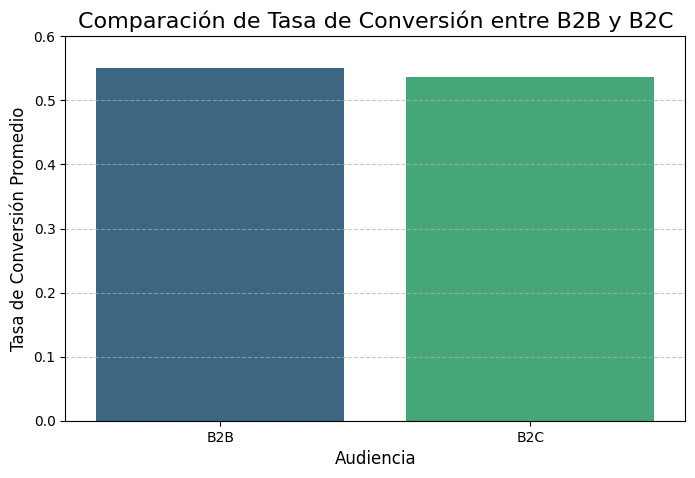

In [111]:
b2b_conversion_mean = df[df['target_audience'] == 'b2b']['conversion_rate'].mean()
b2c_conversion_mean = df[df['target_audience'] == 'b2c']['conversion_rate'].mean()
if pd.isna(b2b_conversion_mean) or pd.isna(b2c_conversion_mean):
    print("Error: No se encontraron datos válidos para B2B o B2C.")
else:
    # Crear un DataFrame para el gráfico
    conversion_data = {
        'Audiencia': ['B2B', 'B2C'],
        'Tasa de Conversión Promedio': [b2b_conversion_mean, b2c_conversion_mean]
         }
    conversion_df = pd.DataFrame(conversion_data)

    # Crear el gráfico de barras
    plt.figure(figsize=(8, 5))
    sns.barplot(data=conversion_df, x='Audiencia', y='Tasa de Conversión Promedio', palette='viridis')
    plt.title('Comparación de Tasa de Conversión entre B2B y B2C', fontsize=16)
    plt.xlabel('Audiencia', fontsize=12)
    plt.ylabel('Tasa de Conversión Promedio', fontsize=12)
    plt.ylim(0, max(b2b_conversion_mean, b2c_conversion_mean) + 0.05)  # Ajustar el límite del eje Y
    plt.grid(axis='y', linestyle='--', alpha=0.7)

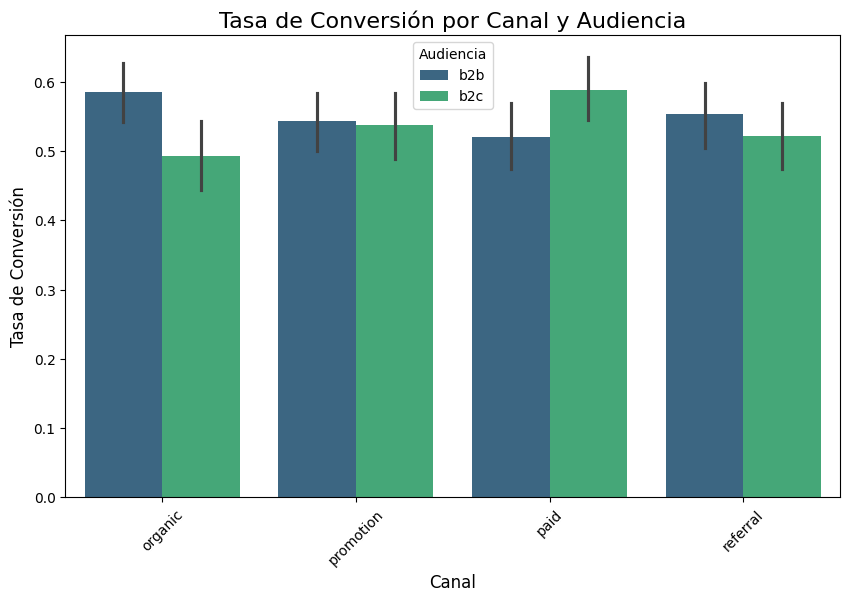

In [112]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='channel', y='conversion_rate', hue='target_audience', palette='viridis')
plt.title('Tasa de Conversión por Canal y Audiencia', fontsize=16)
plt.xlabel('Canal', fontsize=12)
plt.ylabel('Tasa de Conversión', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Audiencia', fontsize=10)

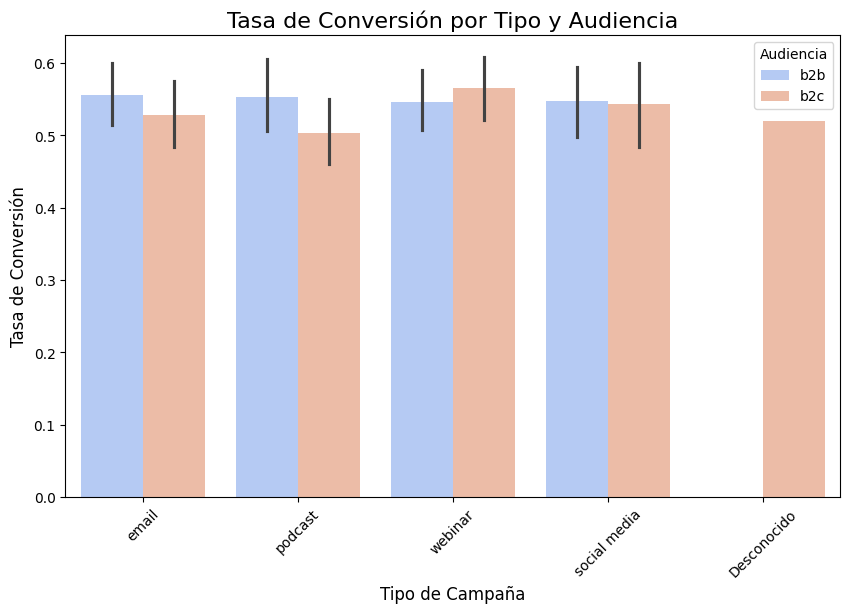

In [113]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='type', y='conversion_rate', hue='target_audience', palette='coolwarm')
plt.title('Tasa de Conversión por Tipo y Audiencia', fontsize=16)
plt.xlabel('Tipo de Campaña', fontsize=12)
plt.ylabel('Tasa de Conversión', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Audiencia', fontsize=10)

In [160]:
# ¿Qué campaña tiene el mayor beneficio neto (net_profit)?
df.groupby('type')['net_profit'].mean().sort_values(ascending=False) #el que más beneficio neto tiene es social media

type
social media       480335.267447
podcast            465391.600000
webinar            443361.425095
email marketing    439282.099786
desconocido        169440.880000
Name: net_profit, dtype: float64

In [161]:
# Calcular métricas clave por tipo de campaña
metrics = df.groupby('type').agg({
    'net_profit': 'mean',
    'budget': 'mean',
    'revenue': 'mean',
    'conversion_rate': 'mean',
    'roi': 'mean'
}).sort_values(by='net_profit', ascending=False)

print("Métricas clave por tipo de campaña:")
print(metrics)

Métricas clave por tipo de campaña:
                    net_profit        budget        revenue  conversion_rate  \
type                                                                           
social media     480335.267447  47134.480979  527469.748426         0.545362   
podcast          465391.600000  50328.927555  515633.191310         0.527162   
webinar          443361.425095  50434.879354  493796.304449         0.556426   
email marketing  439282.099786  85344.148214  524626.248000         0.543679   
desconocido      169440.880000  36800.580000  206241.460000         0.520000   

                       roi  
type                        
social media     29.835013  
podcast          25.305499  
webinar          20.218567  
email marketing  24.635948  
desconocido       4.604299  


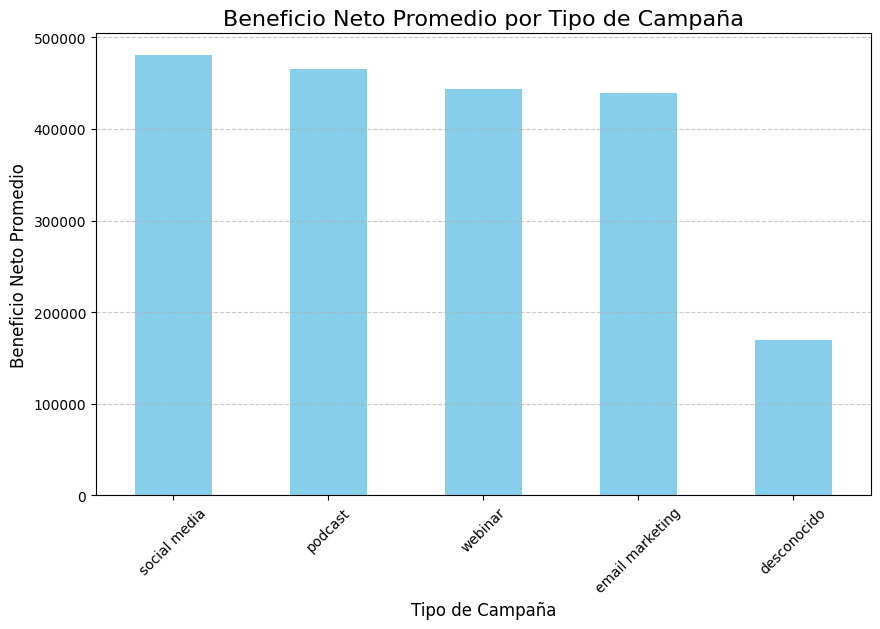

In [162]:
# Visualizar el beneficio neto promedio por tipo de campaña
metrics['net_profit'].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Beneficio Neto Promedio por Tipo de Campaña', fontsize=16)
plt.xlabel('Tipo de Campaña', fontsize=12)
plt.ylabel('Beneficio Neto Promedio', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [ ]:
#¿Existe correlación entre el presupuesto (budget) y los ingresos (revenue)?
correlation_budget_revenue = df['budget'].corr(df['revenue'])
print(f"Coeficiente de correlación entre 'budget' y 'revenue': {correlation_budget_revenue:.2f}")
#Hay correlación negativa muy débil

Coeficiente de correlación entre 'budget' y 'revenue': -0.05


<Figure size 1000x600 with 0 Axes>

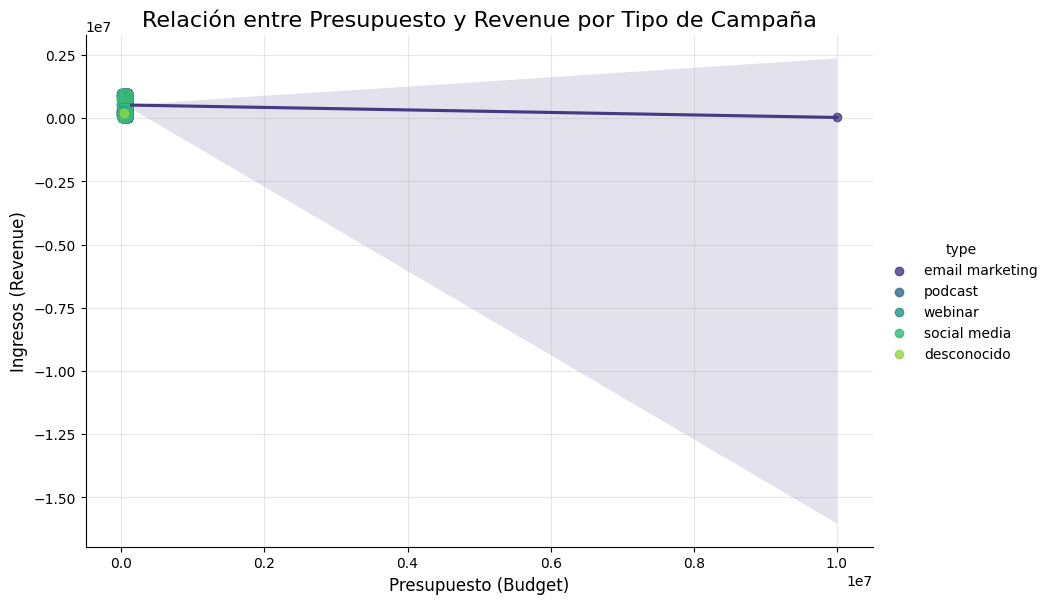

In [167]:
# Gráfico de dispersión con línea de tendencia segmentado por 'type'
plt.figure(figsize=(10, 6))
sns.lmplot(
    data=df,
    x='budget', 
    y='revenue', 
    hue='type',  # Segmentar por tipo de campaña
    palette='viridis', 
    height=6, 
    aspect=1.5
)
plt.title('Relación entre Presupuesto y Revenue por Tipo de Campaña', fontsize=16)
plt.xlabel('Presupuesto (Budget)', fontsize=12)
plt.ylabel('Ingresos (Revenue)', fontsize=12)
plt.grid(alpha=0.3)

<Figure size 1000x600 with 0 Axes>

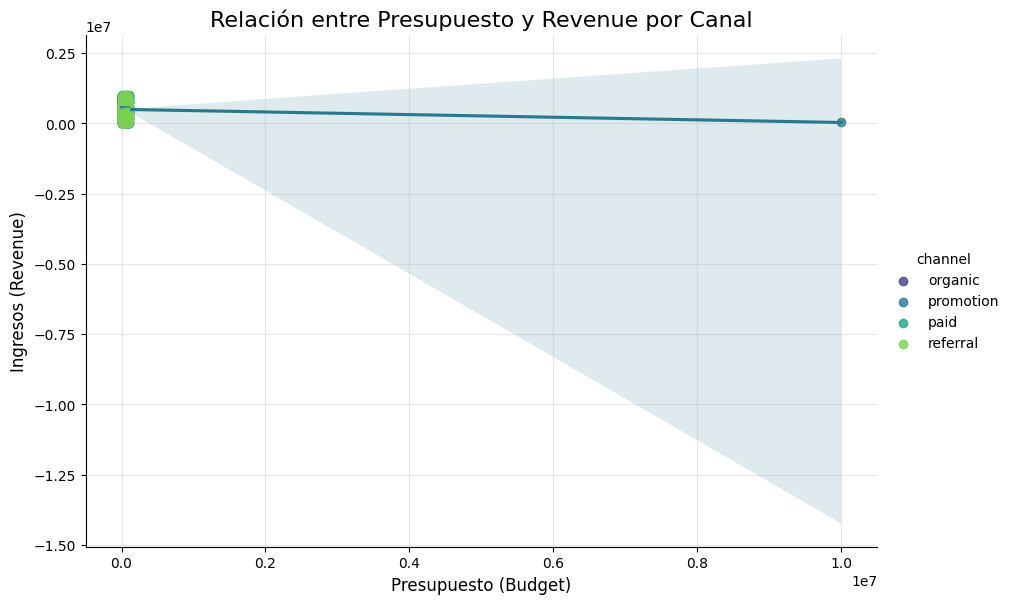

In [168]:
# Gráfico de dispersión con línea de tendencia segmentado por 'channel'
plt.figure(figsize=(10, 6))
sns.lmplot(
    data=df,
    x='budget', 
    y='revenue', 
    hue='channel',  # Segmentar por canal
    palette='viridis', 
    height=6, 
    aspect=1.5
)
plt.title('Relación entre Presupuesto y Revenue por Canal', fontsize=16)
plt.xlabel('Presupuesto (Budget)', fontsize=12)
plt.ylabel('Ingresos (Revenue)', fontsize=12)
plt.grid(alpha=0.3)

In [ ]:
# ¿Qué campañas tienen un ROI mayor a 0.5 y ingresos encima de 500,000?
df_filtered = df[(df['roi'] > 0.5) & (df['revenue'] > 500000)]
print("Campañas con ROI > 0.5 y Revenue > 500,000:")
print(df_filtered[['type', 'roi', 'revenue']])

Campañas con ROI > 0.5 y Revenue > 500,000:
                 type         roi    revenue
0     email marketing   86.795984  709593.48
1     email marketing   28.165567  516609.10
5        social media    6.387951  558302.11
8             webinar   17.144859  734755.76
9        social media  309.138805  563280.30
...               ...         ...        ...
995      social media    5.432401  601987.53
996           podcast   71.589907  537274.20
997           webinar    9.072786  985580.90
998   email marketing    6.909808  613448.30
1007  email marketing   86.795984  709593.48

[534 rows x 3 columns]


Campañas de alto rendimiento:
                type    channel         roi  conversion_rate  net_profit
1    email marketing  promotion   28.165567             0.66   498896.12
9       social media   referral  309.138805             0.85   561464.08
17   email marketing    organic   47.157621             0.96   906061.07
18   email marketing  promotion   25.208030             0.79   442986.51
27   email marketing  promotion   30.721653             0.83   442145.42
..               ...        ...         ...              ...         ...
907          webinar    organic   62.270007             0.98   958135.52
918          webinar  promotion  104.233290             0.76   867669.18
922          webinar  promotion   30.166406             0.65   175990.51
956     social media    organic   83.599902             0.73   195565.25
979  email marketing    organic   25.196347             0.77   789409.37

[114 rows x 5 columns]


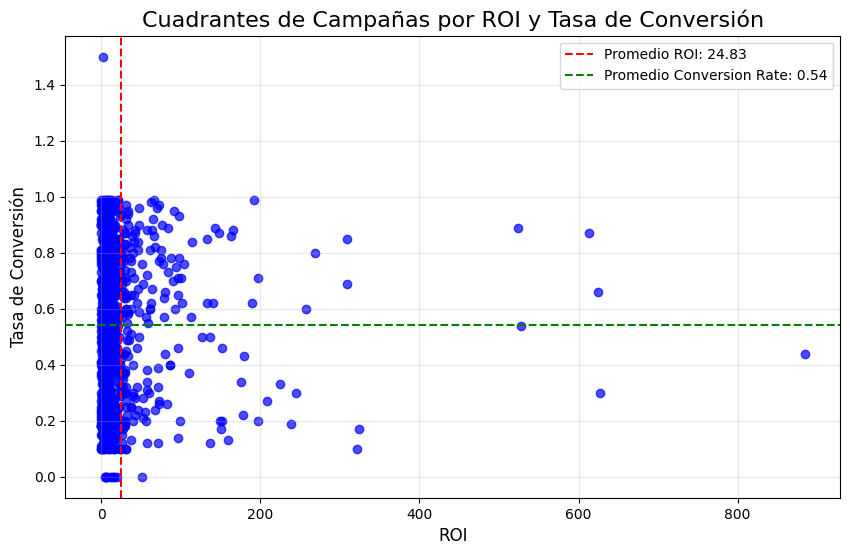

In [178]:
# Calcular los promedios de ROI y tasa de conversión
roi_mean = df['roi'].mean()
conversion_rate_mean = df['conversion_rate'].mean()

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['roi'], df['conversion_rate'], alpha=0.7, c='blue')

# Agregar líneas de referencia (promedios)
plt.axvline(x=roi_mean, color='red', linestyle='--', label=f'Promedio ROI: {roi_mean:.2f}')
plt.axhline(y=conversion_rate_mean, color='green', linestyle='--', label=f'Promedio Conversion Rate: {conversion_rate_mean:.2f}')

# Etiquetas y título
plt.title('Cuadrantes de Campañas por ROI y Tasa de Conversión', fontsize=16)
plt.xlabel('ROI', fontsize=12)
plt.ylabel('Tasa de Conversión', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Filtrar campañas de alto rendimiento
alto_rendimiento = df[(df['roi'] > roi_mean) & (df['conversion_rate'] > conversion_rate_mean)]

# Mostrar las campañas de alto rendimiento
print("Campañas de alto rendimiento:")
print(alto_rendimiento[['type', 'channel', 'roi', 'conversion_rate', 'net_profit']])

In [184]:
# ¿Existen patrones estacionales o temporales en el rendimiento de las campañas?
# Asegurarse de que las columnas de fechas estén en formato datetime
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

# Extraer componentes temporales
df['start_mes'] = df['start_date'].dt.month
df['start_trimestre'] = df['start_date'].dt.quarter
df['start_año'] = df['start_date'].dt.year

# Calcular el promedio de métricas por mes
seasonality_by_month = df.groupby('start_mes').agg({
    'roi': 'mean',
    'conversion_rate': 'mean',
    'net_profit': 'mean'
}).reset_index()

print("Promedio de métricas por mes:")
print(seasonality_by_month)

# Calcular el promedio de métricas por trimestre
seasonality_by_quarter = df.groupby('start_trimestre').agg({
    'roi': 'mean',
    'conversion_rate': 'mean',
    'net_profit': 'mean'
}).reset_index()

print("Promedio de métricas por trimestre:")
print(seasonality_by_quarter)

# Calcular el promedio de métricas por año
seasonality_by_year = df.groupby('start_año').agg({
    'roi': 'mean',
    'conversion_rate': 'mean',
    'net_profit': 'mean'
}).reset_index()

print("Promedio de métricas por año:")
print(seasonality_by_year)


Promedio de métricas por mes:
    start_mes        roi  conversion_rate     net_profit
0           1  32.818394         0.615408  487714.934796
1           2  18.333651         0.494063  454939.351250
2           3  28.066874         0.588000  437627.869474
3           4  23.854269         0.539775  477210.803820
4           5  22.149978         0.537067  510742.156133
5           6  25.552467         0.550633  472711.974684
6           7  24.781843         0.561758  304665.327802
7           8  25.657012         0.533196  519653.662990
8           9  20.423191         0.503854  488025.375938
9          10  21.840939         0.498088  437870.533971
10         11  32.247573         0.536250  402981.677841
11         12  16.765195         0.530735  476448.216765
Promedio de métricas por trimestre:
   start_trimestre        roi  conversion_rate     net_profit
0                1  27.454900         0.575058  461038.247821
1                2  23.880342         0.542469  486097.404321
2      

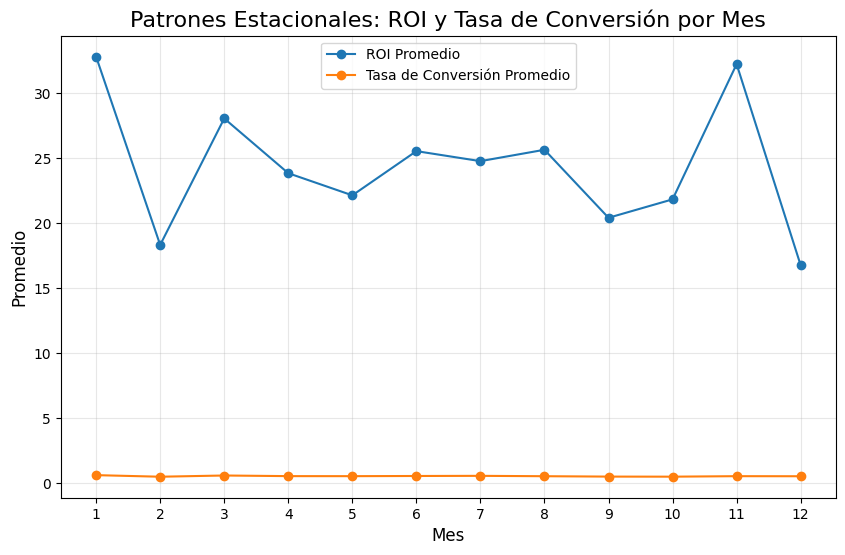

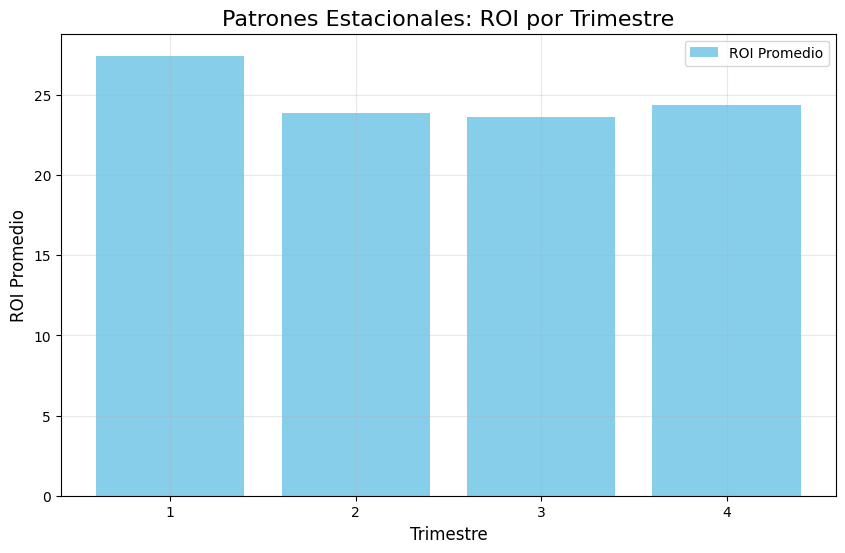

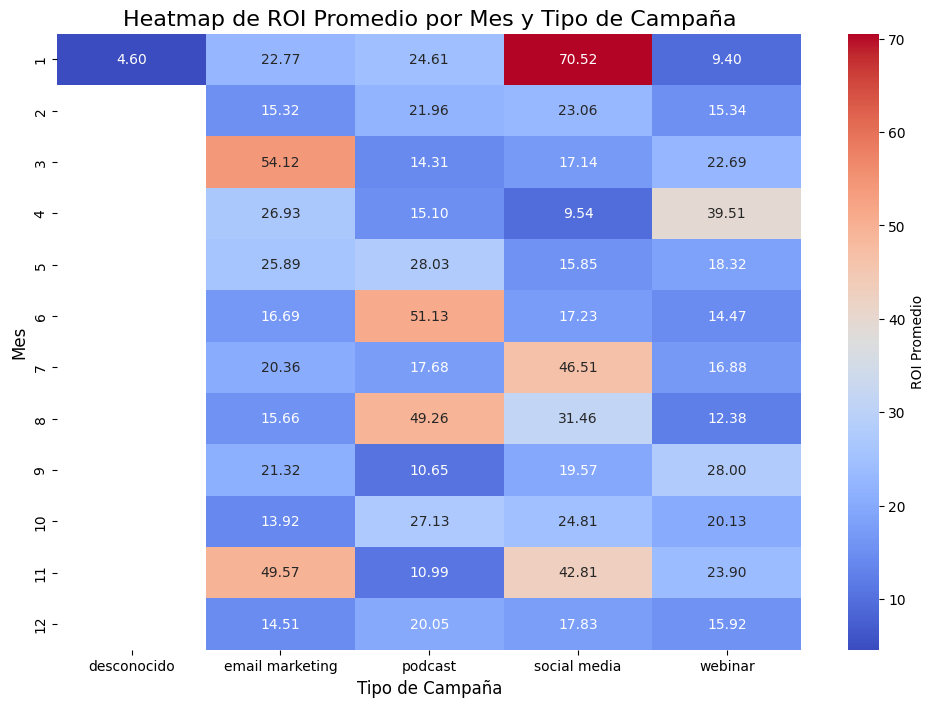

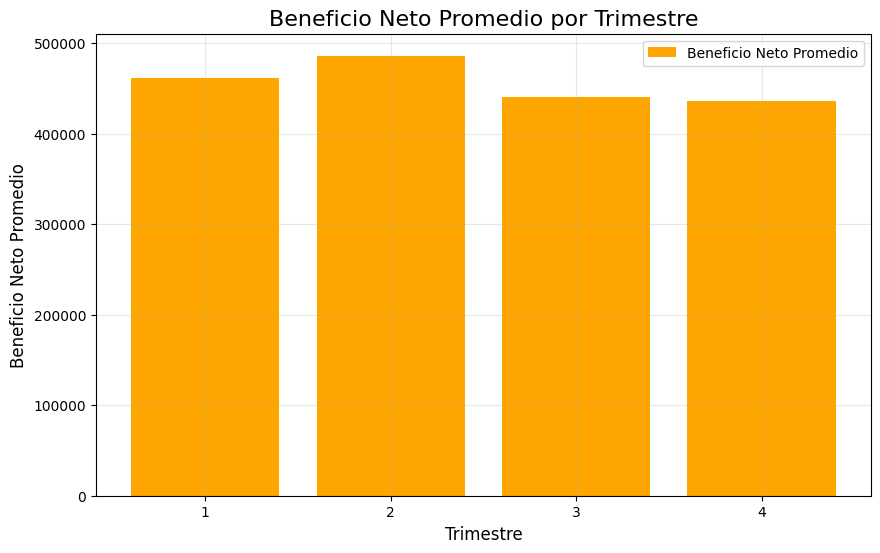

In [188]:
# Gráfico de ROI promedio por mes
plt.figure(figsize=(10, 6))
plt.plot(seasonality_by_month['start_mes'], seasonality_by_month['roi'], marker='o', label='ROI Promedio')
plt.plot(seasonality_by_month['start_mes'], seasonality_by_month['conversion_rate'], marker='o', label='Tasa de Conversión Promedio')
plt.title('Patrones Estacionales: ROI y Tasa de Conversión por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Promedio', fontsize=12)
plt.xticks(range(1, 13))
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Gráfico de ROI promedio por trimestre
plt.figure(figsize=(10, 6))
plt.bar(seasonality_by_quarter['start_trimestre'], seasonality_by_quarter['roi'], color='skyblue', label='ROI Promedio')
plt.title('Patrones Estacionales: ROI por Trimestre', fontsize=16)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('ROI Promedio', fontsize=12)
plt.xticks(range(1, 5))
plt.legend()
plt.grid(alpha=0.3)

# Calcular el promedio de ROI por mes y tipo de campaña
heatmap_data = df.groupby(['start_mes', 'type']).agg({'roi': 'mean'}).reset_index()
heatmap_pivot = heatmap_data.pivot(index='start_mes', columns='type', values='roi')

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'ROI Promedio'})
plt.title('Heatmap de ROI Promedio por Mes y Tipo de Campaña', fontsize=16)
plt.xlabel('Tipo de Campaña', fontsize=12)
plt.ylabel('Mes', fontsize=12)

# Gráfico de barras para el beneficio neto promedio por trimestre
plt.figure(figsize=(10, 6))
plt.bar(seasonality_by_quarter['start_trimestre'], seasonality_by_quarter['net_profit'], color='orange', label='Beneficio Neto Promedio')
plt.title('Beneficio Neto Promedio por Trimestre', fontsize=16)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Beneficio Neto Promedio', fontsize=12)
plt.xticks(range(1, 5))
plt.legend()
plt.grid(alpha=0.3)